<a href="https://colab.research.google.com/github/putto2002/INFO204/blob/master/src/labs/lab07/lab07_StudentUserCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 204 Lab 7 - More Neural Networks (Convolutional Neural Networks, and Transfer Learning)

***<span style='color: #ce2227;'>PLEASE READ ALL THE INSTRUCTIONS AND ACCOMPANYING TEXT IN LAB NOTEBOOKS - THE INFORMATION NEDED TO ANSWER A GIVEN TASK OR INTERPRET A GIVEN RESULT IS OFTEN IN THE TEXT!</span>***

This lab is a short set of exercises to complement the content in Lectures 12 and 13. Specifically, you will observe how a convolutional neural network (ConvNet) is constructed in tensorflow, and then you will attempt to optimise the LeNet-5 architecture presented in Lecture 12 as it is applied to a new problem instance (the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) problem).

This lab will make use of [TensorFlow](https://www.tensorflow.org/), a platform tuned for constructing deep learning models. While uou are welcome to [install TensorFlow](https://www.tensorflow.org/overview/) on your own machine, be aware that best results will be encountered on machines with NVIDIA GPUs and at least 16GB of RAM.  Alternatively, [Google Colab](https://colab.research.google.com/) is set up to run TensorFlow models out-of-the-box, and will be a much simpler solution for completing this lab. ***YOU ARE RECOMMENDED TO USE COLAB FOR THIS LAB***

## Using TPUs

Tensor Processing Units (TPUs) are a means of accelerating the training and executing of your neural networks. They operate outside of your Python process, so some code is required to connect to and subsequently allocate your networks to the TPU compute facilities. The following establishes that connection:

In [1]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.49.103.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.49.103.226:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Our Problem - CIFAR-10

Lectures previously explored the MNIST digit recognition problem - in this lab we will explore a slightly more complicated problem of detected real-world objects in low resolution images. In the CIFAR-10 problem, the objects with an image belong to one of ten possible classes:
  1. airplane
  2. automobile
  3. bird
  4. cat
  5. deer
  6. dog
  7. frog
  8. horse
  9. ship
  10. truck

Each instance in the CIFAR-10 problem is a 32x32 3-channel (red, green, blue) image. There are 50000 images for training, and a well-defined 10000-image test set.

Let's start by loading in our problem instances (and show a handful of example images):

170508288/170498071 [==============================] - 3s 0us/step


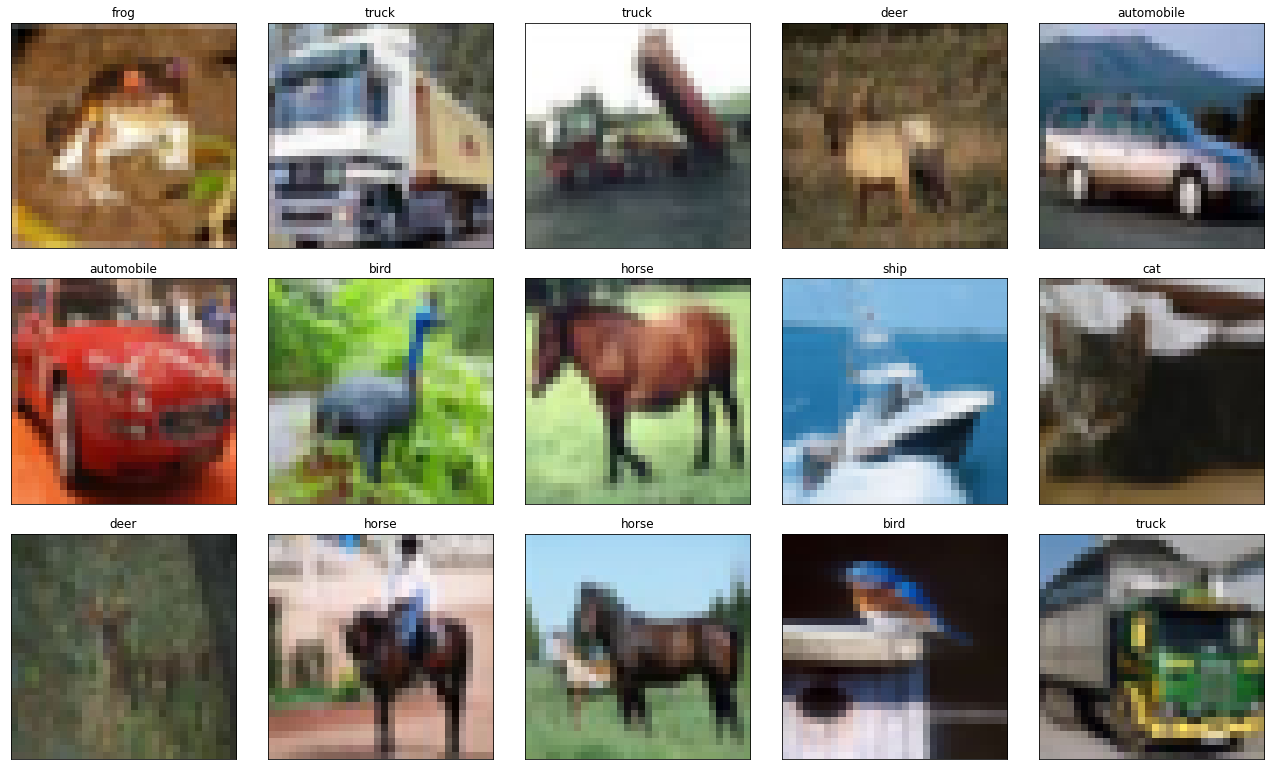

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt

cifar10_classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
input_shape = X_train.shape[1:]

plot_width = 18
nrows = 3
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(plot_width, plot_width / ncols * nrows))
for id in range(nrows * ncols):
    axs[id // ncols][id % ncols].set_xticks([])
    axs[id // ncols][id % ncols].set_yticks([])
    axs[id // ncols][id % ncols].imshow(X_train[id, :, :, :])
    axs[id // ncols][id % ncols].set_title(cifar10_classes[y_train[id]])
plt.tight_layout()

As mentioned in lectures, neural networks typically expect their inputs to be standardised in some way. The raw CIFAR-10 images are RGB images with 256 levels per channel. Here, we normalise them into a [0,1] space by dividing them by 255 (later, when working on the transfer learning exercises, we will need these back in their original scale):

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

Later on, we may be interested in plotting the "confusing" instances (i.e., instances of one type that were predicted to be of another class). We can wrap up this process of plotting these misclassified instances in a function:

In [4]:
def plot_misclassified(images, y_true, y_pred, class_labels, actual, predicted, required_cols=5, figure_width=15):
    import numpy as np
    from matplotlib import pyplot as plt
    from itertools import product
    
    images = np.array(images)
    class_labels = np.array(class_labels)
    actual_class = np.where(class_labels == actual)[0]
    predicted_class = np.where(class_labels == predicted)[0]

    act_as_pred = images[(y_true == actual_class) & (y_pred == predicted_class)]
    reqd_rows = np.ceil(len(act_as_pred) / required_cols).astype(int)
    fig, axs = plt.subplots(nrows=reqd_rows, ncols=required_cols, figsize=(figure_width, figure_width * reqd_rows / required_cols))
    for r, c, in product(range(reqd_rows), range(required_cols)):
        axs[r][c].set_axis_off()

    for idx, img in enumerate(act_as_pred):
        axs[idx // required_cols][idx % required_cols].set_axis_on()
        axs[idx // required_cols][idx % required_cols].set_xticks([])
        axs[idx // required_cols][idx % required_cols].set_yticks([])
        axs[idx // required_cols][idx % required_cols].imshow(img)
    plt.tight_layout()

## Some Global Parameters

To keep things reasonably consistent and allow fair comparisons, we will define a few global parameters here:

In [5]:
batch_size = 192        ## how many instances per update will be presented to the network?
no_epochs = 25          ## how many cycles over the entire training set will we make?
validation_split = 0.2  ## how much of the training data will be used as a validation set (for possible early-halting)
verbosity = 1           ## how much information do we want to see during the learning process?

We will also define a simple function that will take the raw outputs of our network and convert them into class labels using the softmax process:

In [6]:
def softmax_predict(mdl, X):
    from numpy import argmax
    
    ## we assume that the model mdl is set up to make "logit" predictions - that is the raw linear outputs of each class node prior to normalisation via softmax
    
    z = mdl.predict(X) ## predict the logits, can convert these to p via: exp(z) / sum(exp(z))

    ## largest logit equates to largest probability, so pick element in z that is largest and that
    ## will be our class prediction
    y_pred = argmax(z, axis=1)
    
    return y_pred

## A Simple Logistic Regression

We'll start by setting a baseline of performance - a logistic regression seems like a reasonable starting point from which to compare the performance of later models. TensorFlow allows us to make such model fairly easily:

In [7]:
import tensorflow as tf

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ## this defines our loss function for the network

## define the network structure - the Flatten layer essentially takes our image and "flattens" it into a one-dimensional array
with strategy.scope(): ## sets up network on TPU
    ## define the network structure - the Flatten layer essentially takes our image and "flattens" it into a one-dimensional array
    lm = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape), ## convert from 32x32x3 to 3072x1
        tf.keras.layers.Dense(10)  ## feed directly into a fully-connected output layer
    ])

    lm.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy']) ## configure the model with required hyperparameters

print(lm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None


Schematically, our logistic regression "network" looks like this:

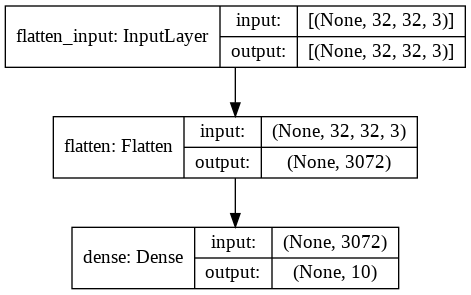

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(lm, show_shapes=True)

Note that a "flatten" layer does not contain any weights or actual logic in the network. It simply reshapes the images from two-dimensional objects to a one-dimensional array. Therefore, it's reasonable to this of this network as having no hidden layers, and therefore equivalent to the logistic regression models presented in earlier classes.

Now, with our model defined, we can fit it to our training data:

In [9]:
lm.fit(X_train, y_train,
       batch_size=batch_size,
       epochs=no_epochs,
       verbose=verbosity,
       validation_split=validation_split)

Epoch 1/25
209/209 [==============================] - 11s 36ms/step - loss: 1.9710 - accuracy: 0.2971 - val_loss: 1.9019 - val_accuracy: 0.3335
Epoch 2/25
209/209 [==============================] - 4s 17ms/step - loss: 1.8435 - accuracy: 0.3525 - val_loss: 1.8297 - val_accuracy: 0.3569
Epoch 3/25
209/209 [==============================] - 4s 17ms/step - loss: 1.8002 - accuracy: 0.3738 - val_loss: 1.8521 - val_accuracy: 0.3482
Epoch 4/25
209/209 [==============================] - 4s 17ms/step - loss: 1.7813 - accuracy: 0.3811 - val_loss: 1.8073 - val_accuracy: 0.3751
Epoch 5/25
209/209 [==============================] - 4s 17ms/step - loss: 1.7712 - accuracy: 0.3869 - val_loss: 1.7882 - val_accuracy: 0.3836
Epoch 6/25
209/209 [==============================] - 3s 17ms/step - loss: 1.7594 - accuracy: 0.3897 - val_loss: 1.7921 - val_accuracy: 0.3851
Epoch 7/25
209/209 [==============================] - 3s 17ms/step - loss: 1.7507 - accuracy: 0.3949 - val_loss: 1.8076 - val_accuracy: 0.373

And now we extract our predictions using our previously defined function:

In [10]:
y_pred = softmax_predict(lm, X_test)

Finally, let's view the model's performance and maybe present some examples of misclassified instances:

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Logistic Regression Performance:
[[344  14  18 150   6   7  15  50 346  50]
 [ 66 252  10 141  14  21  22  48 213 213]
 [ 76  15 162 330  58  35 113  81 113  17]
 [ 28  11  39 600  22  65  55  36  82  62]
 [ 44   2  85 306 191  31 129 125  66  21]
 [ 31   6  52 476  37 170  37  67  99  25]
 [ 10   4  41 416  58  22 352  33  42  22]
 [ 28   7  24 240  38  39  27 440  95  62]
 [ 80  19   2 102   2   6   5   8 703  73]
 [ 80  52   8  95   8  13  41  49 207 447]]
0.3661


The model appears to be "wrong" more often than not. Let's see if there's anything interesting in the misclassified images. Say, between cats and dogs:

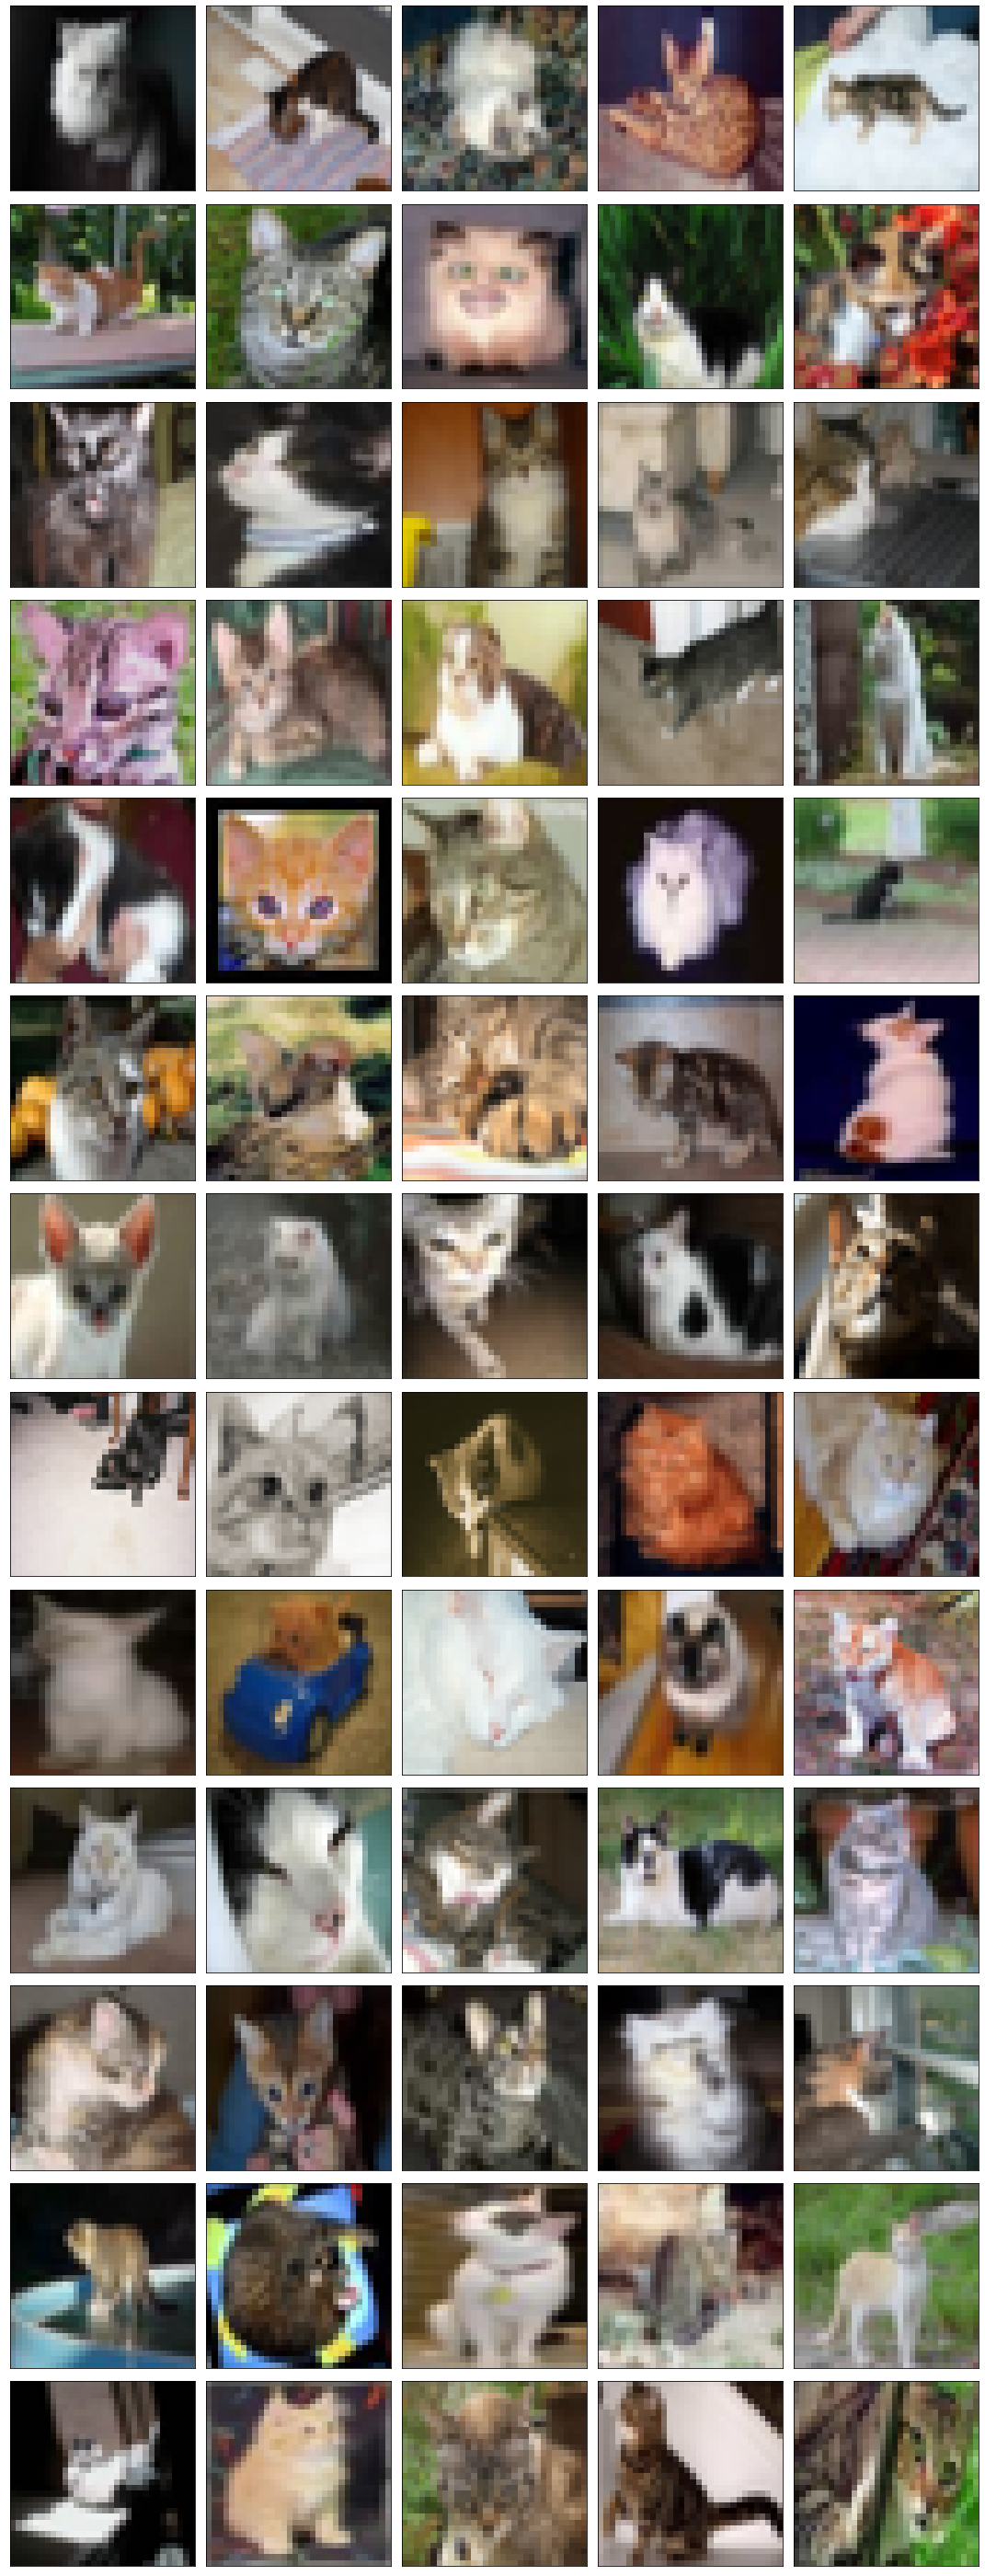

In [12]:
plot_misclassified(X_test, y_test, y_pred, cifar10_classes, actual='cat', predicted='dog')

These all seem pretty cat-like. What about in the opposite direction?

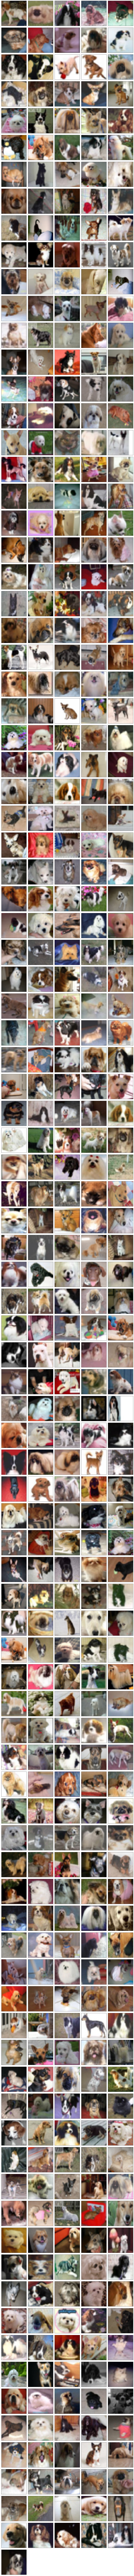

In [13]:
plot_misclassified(X_test, y_test, y_pred, cifar10_classes, actual='dog', predicted='cat')

Again, even though these are low resolution images, not many people would confuse these dogs for cats!

The results suggest that a linear model could be significantly improved upon - let's see if there's something else we can use!

## The LeNet-5 Convolutional Neural Network

Recall from lectures that convolutional neural networks attempt to capture local feature information in images through the use of learned convolution kernels and progressive pixel pooling. Here, we will try to reuse the LeNet-5 ConvNet that was presented in lectures - although this type of network was tailored to detection of handwritten digits, it may serve as a useful baseline of ConvNet performance. As with logistic regression, TensorFlow provides all the basic functionality required to implement ConvNets. Let's start by implementing the architecture:

In [14]:
import tensorflow as tf

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ## this defines our loss function for the network

with strategy.scope():
    lenet5 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='tanh'),
        tf.keras.layers.Dense(84, activation='tanh'),
        tf.keras.layers.Dense(10)
    ])

    lenet5.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
print(lenet5.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

A couple of key parameters should be discussed here:
 * The first argument of the Conv2D layer is the ***number of kernels*** to be learned in the given layer (e.g., 6 kernels are learned in the first layer)
 * The kernel_size argument of the Conv2D layer determines how big the kernels are in the layer (e.g., a 3x3, 5x5, 7x7, ... lattice)
 * The activation argument of all layers determines the activation function that is used - by default the "identity" function is used, but this can also be the tanh or relu function.
 * The Dense layer present a fully-connected hidden layer, with the first argument reprenting the number of hidden units in the layer.
 
In the next section of this lab, you will interact with these arguments and layers to improve the model architecture.

As before, we can view a schematic of the model:

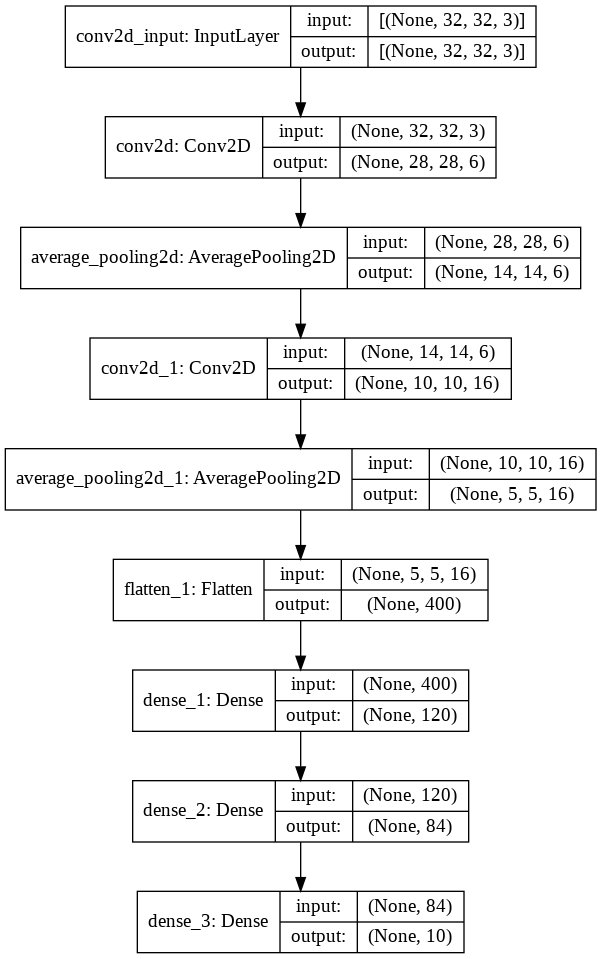

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(lenet5, show_shapes=True)

We can see that the convolution kernels take an n-channel image as input, and produce an m-channel image as output (for example, the first layer takes the 32x32x3 input image, applies the learned kernel functions to each pixel in the image that is surrounded by a 5x5 neighbourhood of pxels, and produces a six-channel 28x28 image as output). Average Pooling is a "virtual" layer that does not have any learnable parameters - the simply take the input n-channel image and effectively resize it by representing a local neighbourhood of pixels as a single value (per channel).

Finally, let's train and evaluate the model:

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

lenet5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

y_pred = softmax_predict(lenet5, X_test)

print("LeNet-5 Model Details:")
print(lenet5.summary())
print("LeNet-5 Performance:")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Epoch 1/25
209/209 [==============================] - 13s 41ms/step - loss: 1.8760 - accuracy: 0.3303 - val_loss: 1.7821 - val_accuracy: 0.3724
Epoch 2/25
209/209 [==============================] - 4s 17ms/step - loss: 1.7250 - accuracy: 0.3940 - val_loss: 1.7080 - val_accuracy: 0.3982
Epoch 3/25
209/209 [==============================] - 4s 17ms/step - loss: 1.6521 - accuracy: 0.4205 - val_loss: 1.6224 - val_accuracy: 0.4338
Epoch 4/25
209/209 [==============================] - 4s 17ms/step - loss: 1.5665 - accuracy: 0.4458 - val_loss: 1.5659 - val_accuracy: 0.4494
Epoch 5/25
209/209 [==============================] - 4s 17ms/step - loss: 1.5037 - accuracy: 0.4662 - val_loss: 1.4987 - val_accuracy: 0.4702
Epoch 6/25
209/209 [==============================] - 4s 17ms/step - loss: 1.4375 - accuracy: 0.4904 - val_loss: 1.4653 - val_accuracy: 0.4806
Epoch 7/25
209/209 [==============================] - 4s 17ms/step - loss: 1.3909 - accuracy: 0.5034 - val_loss: 1.4370 - val_accuracy: 0.485

Looks like our basic LeNet-5 model is a substantial improvement over a logistic regression! Let's see if you can do better though.

**Task 1:** Extend the the LeNet-5 architecture to improve its performance. Use the insights from Lecture 12 to inform your process, along with the following suggestions:
  1. Increasing or decreasing the number of convolution kernels in each layer
  2. Increasing or decreasing the size of the convolution kernels in each layer
  3. Adding additional convolution layers into the network between the pooling layers
  4. Adding [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers to the network
  5. Changing the activation functions
  
***DON'T GO OVERBOARD WITH THIS!*** It should be relatively easy to get prediction performance in the low 60% region with one simple tweak, and 70% should be fairly easy to achieve. Set yourself a time limit of twenty minutes for this exercise!

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ## this defines our loss function for the network

with strategy.scope():
    lenet5 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)
        
    ])

    lenet5.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

lenet5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

z = lenet5.predict(X_test) ## predict the logits, can convert these to p via: exp(z) / sum(exp(z))
## largest logit equates to largest probability, so pick element in z that is largest and that
## will be our class prediction
y_pred = np.argmax(z, axis=1)

print("Modified LeNet-5 Model Details:")
print(lenet5.summary())
print("Modified LeNet-5 Performance:")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Epoch 1/25
209/209 [==============================] - 17s 52ms/step - loss: 1.8268 - accuracy: 0.3225 - val_loss: 1.5062 - val_accuracy: 0.4593
Epoch 2/25
209/209 [==============================] - 4s 18ms/step - loss: 1.4921 - accuracy: 0.4611 - val_loss: 1.3937 - val_accuracy: 0.5138
Epoch 3/25
209/209 [==============================] - 4s 18ms/step - loss: 1.3470 - accuracy: 0.5228 - val_loss: 1.2536 - val_accuracy: 0.5535
Epoch 4/25
209/209 [==============================] - 4s 18ms/step - loss: 1.2308 - accuracy: 0.5689 - val_loss: 1.2200 - val_accuracy: 0.5653
Epoch 5/25
209/209 [==============================] - 4s 18ms/step - loss: 1.1389 - accuracy: 0.6071 - val_loss: 1.0663 - val_accuracy: 0.6272
Epoch 6/25
209/209 [==============================] - 4s 19ms/step - loss: 1.0686 - accuracy: 0.6322 - val_loss: 1.0365 - val_accuracy: 0.6360
Epoch 7/25
209/209 [==============================] - 4s 18ms/step - loss: 0.9979 - accuracy: 0.6565 - val_loss: 0.9901 - val_accuracy: 0.654

**TASK 2:** Briefly describe the changes that you made to the network to achieve the performance improvement:

- Increased the number of convolution kernels in the first convolution layer from 6 to 32, and increase the number of convolution kernels in the second convolution layer from 16 to 64.
- Changed the activations functions from tanh to relu
- Decreased the size of the convolution kernels in each convolution layer from 5 to 3.
- Added the Dropout layer with the rate of 0.5 before the last Dense layer or the output layer.
- Added an additional convolution layer into the network between the pooling layers. This newly added convolution layer has 128 convolution kernels and convolution kernels size of 3. 

## Transfer Learning

Having completed the above step, you should now feel that tuning the architecture of a ConvNet is not exactly a trivial task. As discussed in lectures, there exists another strategy to achieving good performance - take an existing model that has been trained on a related task and modify it to produce predictions for the current problem. This is an example of _transfer learning_.

For transfer learning we need an existing model - here we will use the [Inception V3](https://cloud.google.com/tpu/docs/inception-v3-advanced) model. This particular model has been prviously trained by fitting it to the [1000-class ImageNet](https://www.image-net.org/) problem - this enables it to have good general purpose extraction of useful features in images that we hope will be beneficial in solving the CIFAR-10 problem. However, this pre-trained model assumes an image size of at least 150x150x3, and assumes the inputs are in a different scale to what we have used so far. Therefore, the first step we need to perform is to set up and present our data correctly. First, let's correct the training instance values:

In [41]:
from tensorflow.keras.applications.inception_v3 import preprocess_input ## imports the function that makes our instances compatible with the Inception V3 network

## note that earlier we scaled the input features from [0,255] to [0,1] - we need to reverse this before preprocessing
tliv3_X_train = np.array([ preprocess_input(i * 255) for i in X_train ])
tliv3_X_test = np.array([ preprocess_input(i * 255) for i in X_test ])

We also need to resize the images to be large enough to satisfy the Inception V3 model requirements. If we were to resize the images up front, we could easily run out of memory. Instead, we will add a layer in our network that will perform the resizing for us:

In [42]:
import tensorflow as tf

input_layer = tf.keras.Input(shape=(32, 32, 3))
resize_layer = tf.keras.layers.Resizing(150, 150)(input_layer)

Now, with the model input correctly defined, we can load in our pretrained model:

In [43]:
iv3 = tf.keras.applications.inception_v3.InceptionV3(input_tensor=resize_layer, weights='imagenet', include_top=False, pooling='avg')

87924736/87910968 [==============================] - 1s 0us/step


This network is rather large (about 90MB of weight parameters!), and also needs to be connected back to our problem's class labels. We do this by creating an output layer:

In [44]:
output_layer = tf.keras.layers.Dense(10)(iv3.output)

One last thing that we need to do to the pre-trained model is "fix" its parameters (weights). As it has already been trained, we should not need to put further effort into optimising these weights:

In [45]:
for layer in iv3.layers:
    layer.trainable = False

We now have all the pieces in place to construct our final model for the CIFAR-10 problem:

In [46]:
with strategy.scope():
    input_layer = tf.keras.Input(shape=(32, 32, 3))
    resize_layer = tf.keras.layers.Resizing(150, 150)(input_layer)
    iv3 = tf.keras.applications.inception_v3.InceptionV3(input_tensor=resize_layer, weights='imagenet', include_top=False, pooling='avg')
    output_layer = tf.keras.layers.Dense(10)(iv3.output)
    tliv3 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    tliv3.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

for layer in iv3.layers:
    layer.trainable = False

print("Transfer Learning Inception V3 Model Details:")
print(tliv3.summary())

Transfer Learning Inception V3 Model Details:
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
resizing_1 (Resizing)           (None, 150, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_155 (Conv2D)             (None, 74, 74, 32)   864         resizing_1[0][0]                 
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_155[0][0]                 
________________________________________________

As you can see, this model is pretty big (nearly 22 MILLION parameters). However, we only need to train the new connections between our class labels and the pre-trained network, so the actual number of weight that we are concerned about is much smaller (about 20 thousand). Before starting the training process, let's view a schematic just to see what this model looks like:

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(tliv3, show_shapes=True)

Yes, that is a BIG network! Okay, let's fit the new classes to the network - this shouldn't require as much effort as training the entire network, so let's only do this for a handful of epochs:

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

tliv3.fit(tliv3_X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          verbose=verbosity,
          validation_split=validation_split)

y_pred = softmax_predict(tliv3, tliv3_X_test)

print("Transfer Learning Inception V3 Performance:")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Epoch 1/3
209/209 [==============================] - 149s 369ms/step - loss: 0.6194 - accuracy: 0.7947 - val_loss: 0.6596 - val_accuracy: 0.7965
Epoch 2/3
209/209 [==============================] - 19s 89ms/step - loss: 0.3194 - accuracy: 0.8940 - val_loss: 0.8443 - val_accuracy: 0.7440
Epoch 3/3
209/209 [==============================] - 19s 89ms/step - loss: 0.2181 - accuracy: 0.9277 - val_loss: 0.4164 - val_accuracy: 0.8680
Transfer Learning Inception V3 Performance:
[[932   2  23   3  21   0   1   1  17   0]
 [ 42 909   3   1   8   1   2   1  10  23]
 [ 21   0 832  14  82  14  26   6   5   0]
 [ 32   1  55 693  61 111  23  13  10   1]
 [  3   0   7   8 957  11   5   9   0   0]
 [ 16   1  29  65  49 810  13  17   0   0]
 [  6   0  23  44  50  12 863   2   0   0]
 [ 20   0  11  14  63  20   1 870   1   0]
 [ 61   5   4   1   3   0   2   0 924   0]
 [ 59  41   1   8  13   3  11   4  24 836]]
0.8626


As can be seen, right out of the box the pre-trained model is able to provide good performance without the need for complex hand tuning. No doubt we could improve upon this if we wanted, but that is not really the goal here. The point of this exercise is to demonstrate that a transfer learning may offer quick, easy and accessible performance for a given problem and should be at least considered as part of the initial explorations into a problem before laborious crafting of a ConvNet is performed.

## The End

You've reached the end of the lab. Be sure to save and upload your work to Blackboard before the due date. ***Assuming that there is time remaining in the lab, you should use this time to work on the first assignment.***